In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# read Matches file
matches=pd.read_csv('matches.csv')
#print only the first 5 rows
matches.head(5)



,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
#read Delivery file
delivery=pd.read_csv('deliveries.csv') 
 #print only the first 5 rows
delivery.head(5)




,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
#--> finding the number of matches played in total
print ("Total number of matches played:", len(matches))
#--> Location of Matches, name of teams that played and the name of unique umpires
print(' \n Location for all matches: \n',matches['city'].unique(), ' \n \n Teams :',matches['team1'].unique(), '\n \nTotal umpires ',matches['umpire1'].unique())


Total number of matches played: 756
 
 Location for all matches: 
 ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']  
 
 Teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals'] 
 
Total umpires  ['AY Dandekar' 'A Nand Kishore' 'Nitin Menon' 'AK Chaudhary' nan
 'A Deshmukh' 'KN Ananthapadmanabhan' 'YC Barde' 'S Ravi' 'CB Gaffaney'
 'M Erasmus' 'NJ Llong' 'CK Nandan' 'Asad Rauf' 'MR Benson' 'Aleem Dar'
 'SJ Davis'

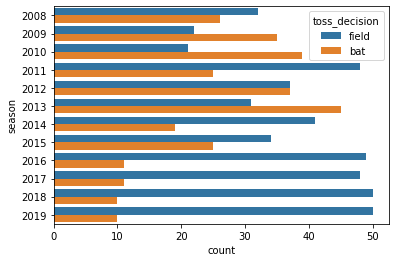

<Figure size 1440x720 with 0 Axes>

In [19]:
#--> The graph will show the decision of fielding or batting if a team wins the toss. 
sns.countplot(y='season',hue='toss_decision',data=matches)
fig=plt.figure(figsize=(20,10))
mlt.show()




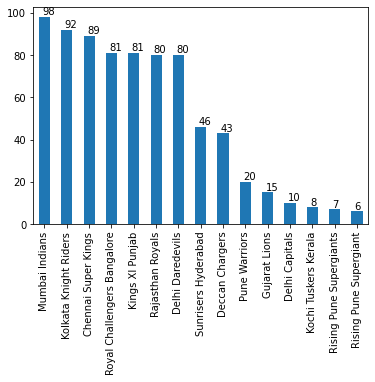

<Figure size 1008x504 with 0 Axes>

In [20]:
#--> The graph shows the team that won the most tosses
u=matches['toss_winner'].value_counts().plot.bar()
fig=plt.figure(figsize=(14,7))
for l in u.patches:
    u.annotate(format(l.get_height()), (l.get_x()+0.15, l.get_height()+1))
mlt.show()


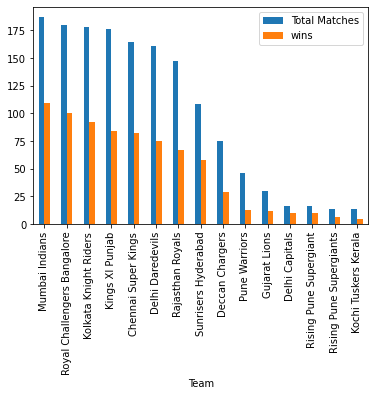

In [9]:
#--> The graph shows the team that won the most number of matches
u=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=u.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams['wins']=matches['winner'].value_counts().reset_index()['winner']
matches_played_byteams.set_index('Team',inplace=True)
matches_played_byteams.plot.bar()
mlt.show()


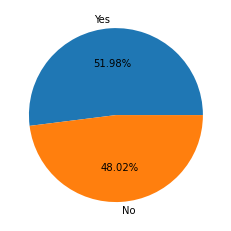

In [21]:
#--> Probability that the toss winner will win the match
z=matches[matches['toss_winner']==matches['winner']]
slices=[len(z),(len(matches)-len(z))]
labels=['Yes','No']
mlt.pie(slices,labels=labels,autopct='%1.2f%%')
fig = mlt.gcf()
mlt.show()


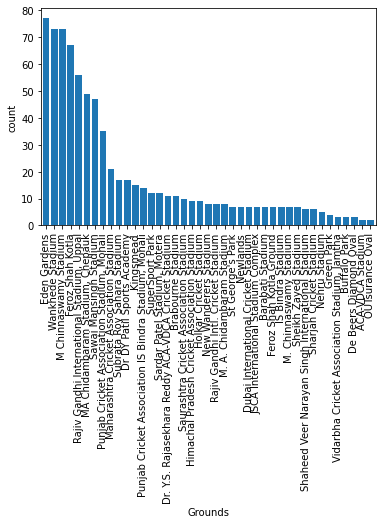

<Figure size 1440x576 with 0 Axes>

In [25]:
#--> Most popular grounds to play
ls = matches['venue'].value_counts().plot.bar(width=.8)
fig=plt.figure(figsize=(20,8))
ls.set_xlabel('Grounds')
ls.set_ylabel('count')
mlt.show()




C:\Users\saumy\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1330: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


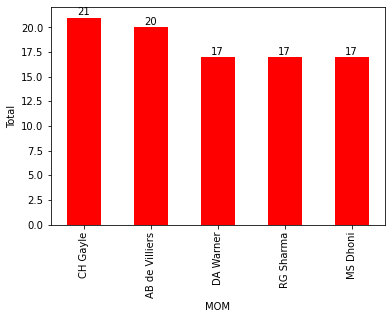

In [23]:
#--> The Graph shows the top 5 most Man of the match winners
pp = matches['player_of_match'].value_counts().head(5).plot.bar( color='R')  
pp.set_xlabel('MOM') 
pp.set_ylabel('Total')
for p in pp.patches:
    pp.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
mlt.show()

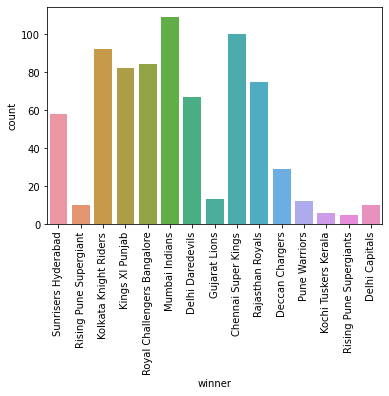

In [27]:
#--> Team that won the most
sns.countplot(x='winner', data=matches)
mlt.xticks(rotation='vertical')
mlt.show()




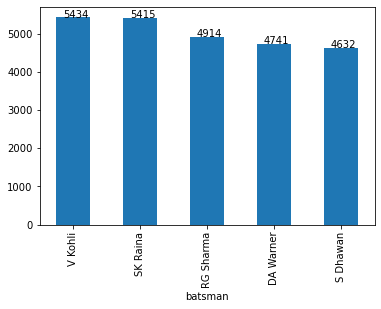

In [28]:
#--> Highest run scoring batsman (Top 5)
max_runs=delivery.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:5].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
mlt.show()




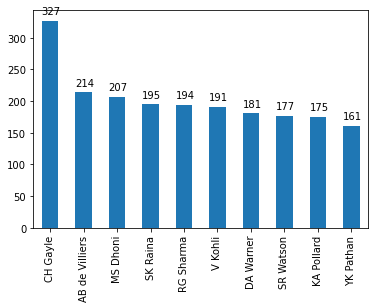

In [29]:
#--> Player that has scored the most number of sixes
ax=delivery[delivery['batsman_runs']==6].batsman.value_counts()[:10].plot.bar()
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
mlt.show()